In [1]:
import pandas as pd
import os
import numpy as np
import sklearn
import dataFuncs
import matplotlib.pyplot as plt

#Initialise repositories
_projroot = os.path.abspath('.')
_datadir = os.path.join(_projroot,'data')
_preprocesseddir = os.path.join(_datadir,'preprocesseddata')
_rawdir = os.path.join(_datadir,'rawdata')

In [2]:
#Create datasets
from sklearn.model_selection import train_test_split

WCC_Survey = pd.read_csv('WCCSurvey_binary.csv')
WCC_Survey = WCC_Survey.dropna()
#WCC_Survey = WCC_Survey.drop('Unnamed: 0', axis = 1)
WCC_Survey = WCC_Survey.drop('case', axis = 1)
WCC_Survey = WCC_Survey.drop('Q26j', axis = 1)
print(WCC_Survey.columns)

#Separate digitally excluded and non-excluded
WCC_Survey_1 = WCC_Survey[WCC_Survey['Target'] == 1]
WCC_Survey_0 = WCC_Survey[WCC_Survey['Target'] == 0]

#WCC_Survey = WCC_Survey.drop('Unnamed: 0', axis = 1)

WCC_Survey_Features = WCC_Survey.drop('Target', axis = 1)
#WCC_Survey_Target_1 = WCC_Survey['Target']]WCC_Survey_Features_0 = WCC_Survey.drop('Target', axis = 1)
#WCC_Survey_Target_1 = WCC_Survey['Target']
#print(WCC_Survey_Features.head())

Index(['Target', 'S1', 'AGE', 'Q3', 'Q4', 'Q5a', 'Q5b', 'Q5c', 'Q5d', 'Q5e',
       'Q5f', 'Q5g', 'Q5h', 'Q5i', 'Q5j', 'Q5k', 'Q5l', 'Q8a', 'Q8b', 'Q8c',
       'Q8d', 'Q8e', 'Q8f', 'Q11a', 'Q11b', 'Q11c', 'Q11d', 'Q11e', 'Q12a',
       'Q12b', 'Q12c', 'Q12d', 'Q12e', 'Q12f', 'Q12g', 'Q12h', 'Q12i', 'Q12j',
       'Q12k', 'Q12l', 'Q13a', 'Q13b', 'Q13c', 'Q13d', 'Q13e', 'Q13f', 'Q13g',
       'Q13h', 'Q13i', 'Q13j', 'Q20', 'Q21', 'Q22', 'Q25', 'Q26a', 'Q26b',
       'Q26c', 'Q26d', 'Q26e', 'Q26f', 'Q26g', 'Q26h', 'Q26i', 'Q26k', 'Q27',
       'Q28', 'Q29', 'Q30', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36a', 'Q36b', 'Q36c',
       'Q31', 'Q37a', 'Q38', 'Postcode_clean', 'Ward'],
      dtype='object')


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

#Define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.abs(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


NameError: name 'X_train' is not defined

<Figure size 1296x1296 with 0 Axes>

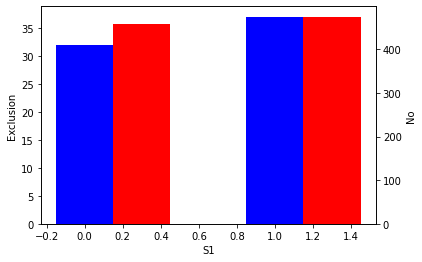

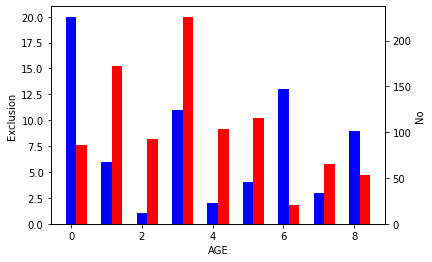

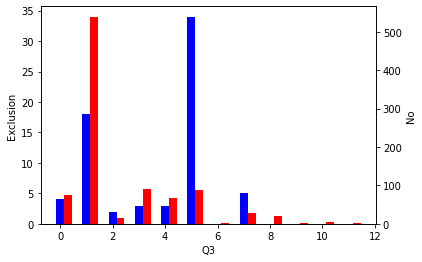

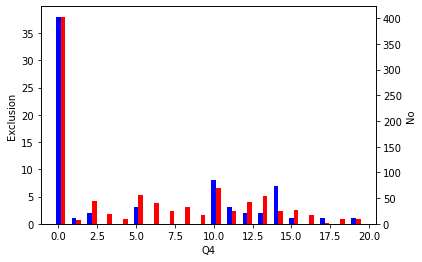

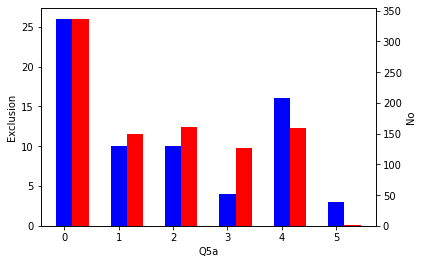

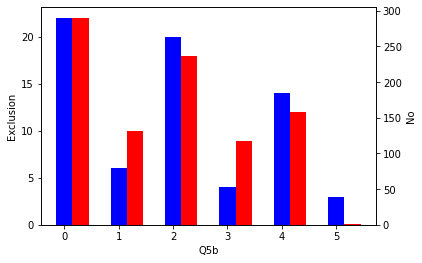

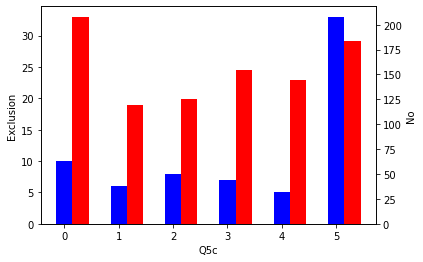

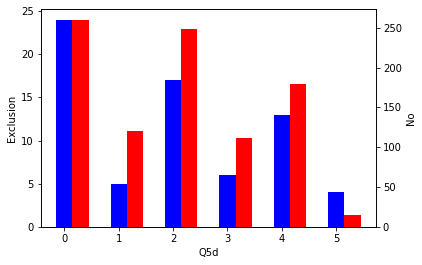

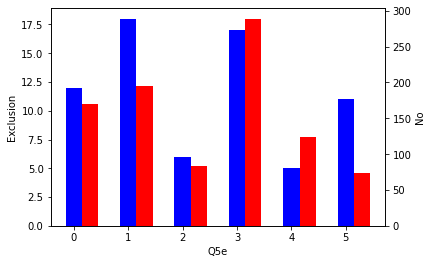

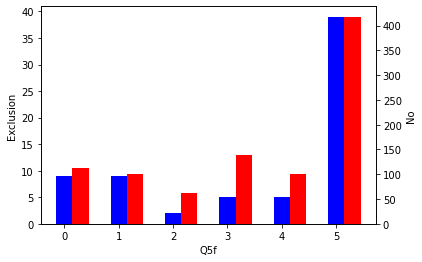

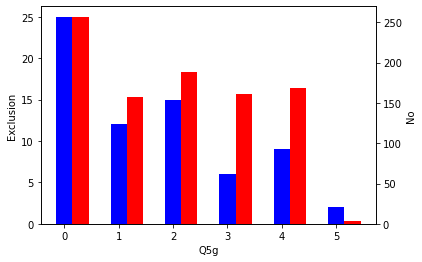

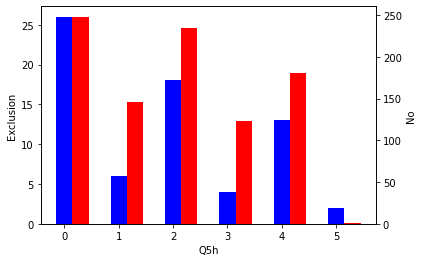

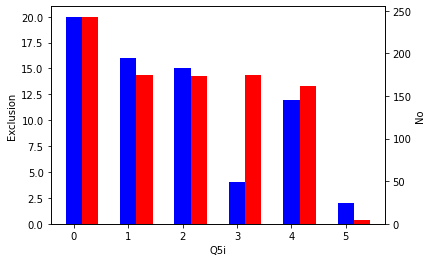

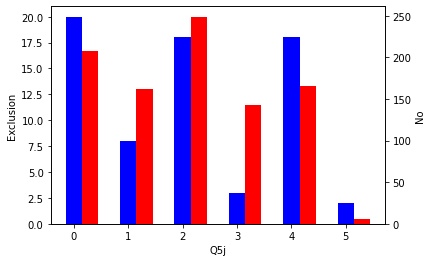

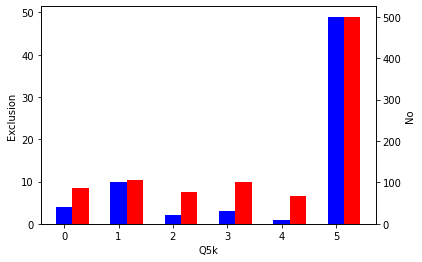

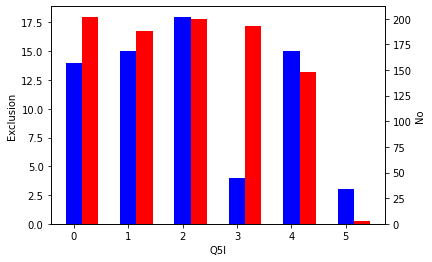

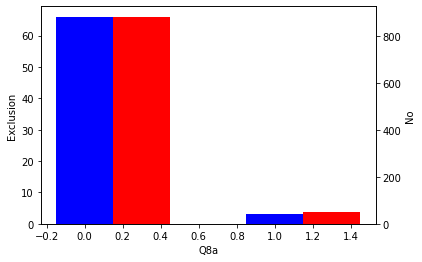

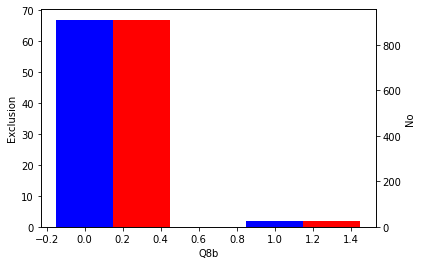

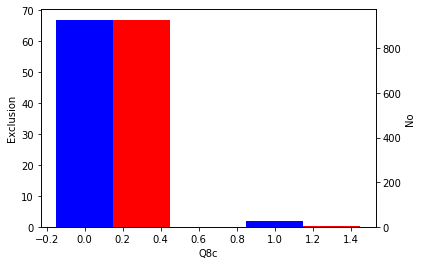

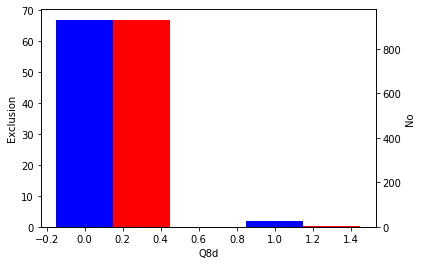

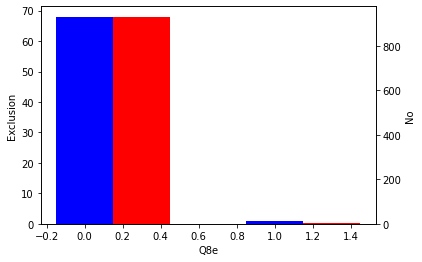

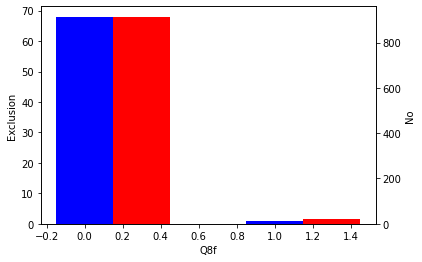

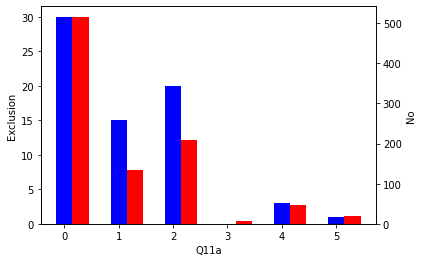

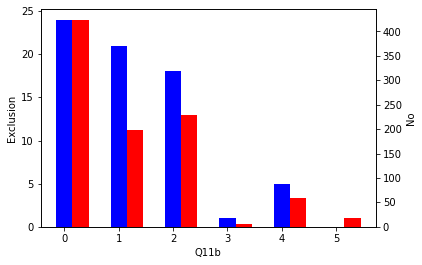

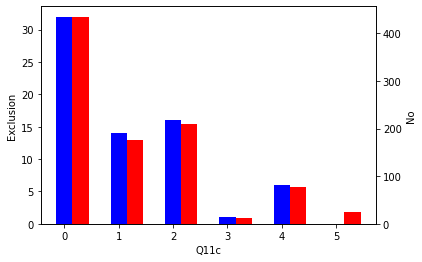

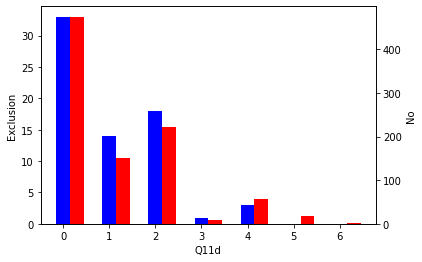

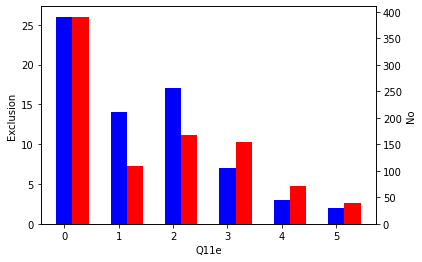

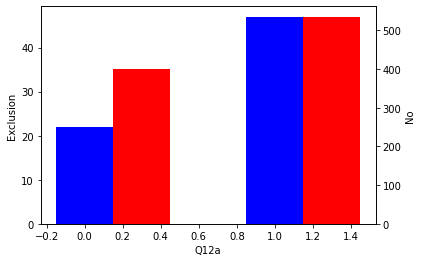

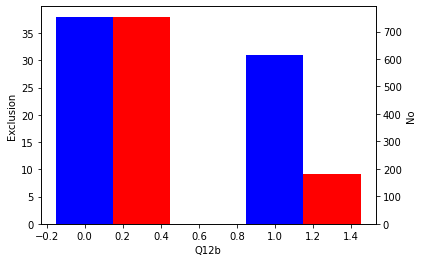

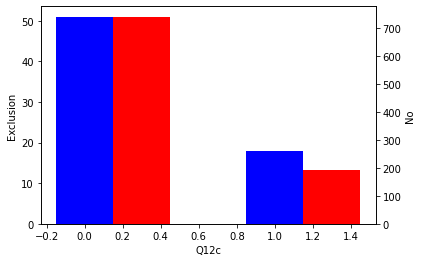

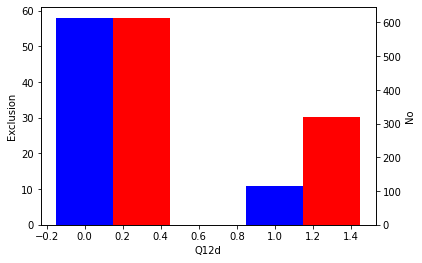

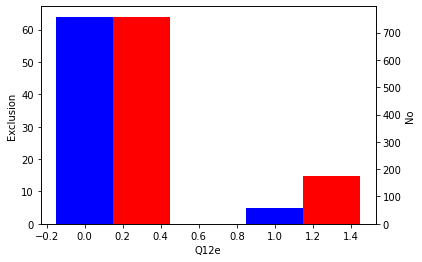

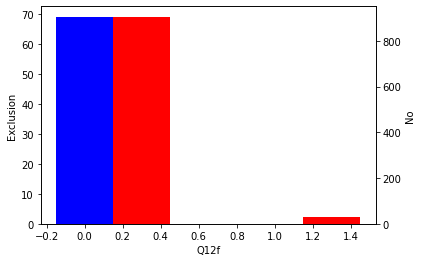

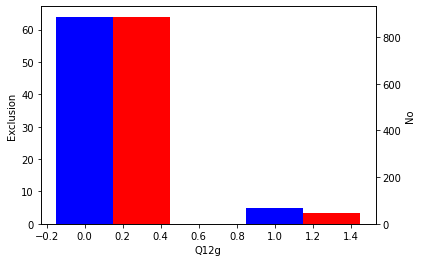

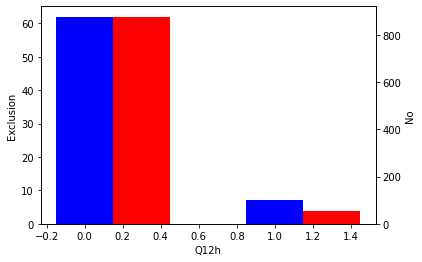

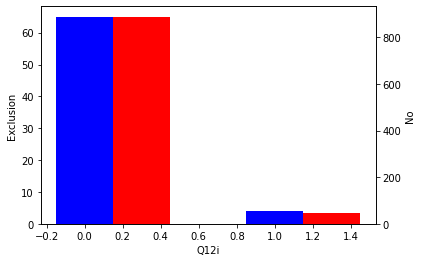

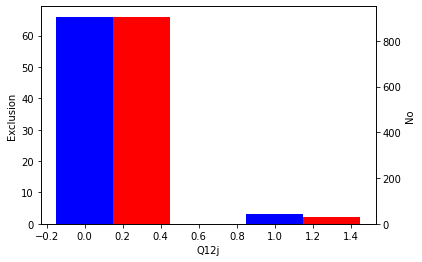

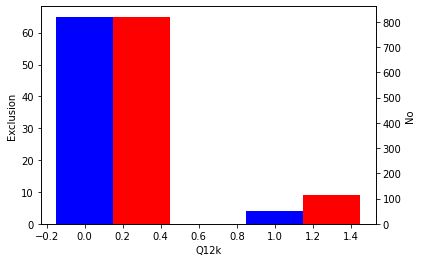

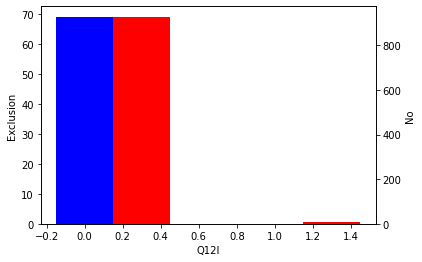

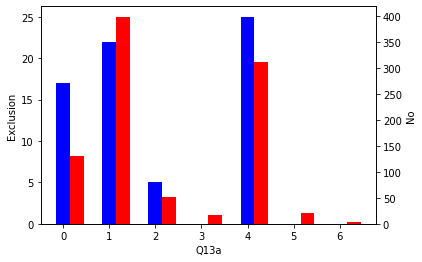

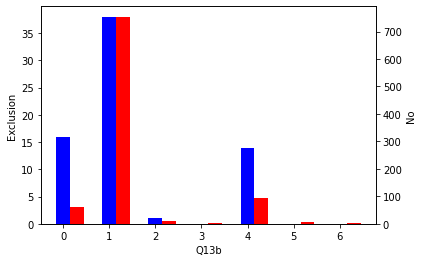

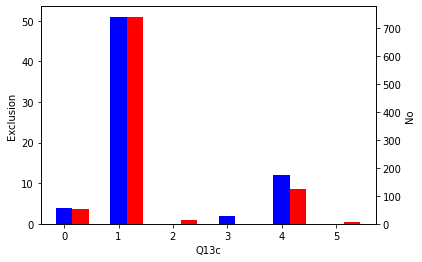

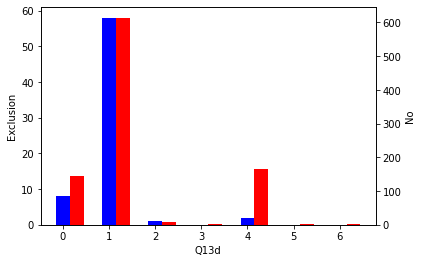

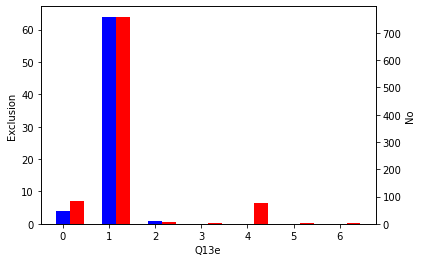

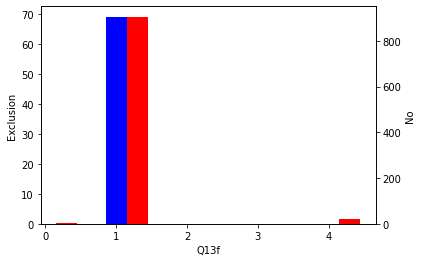

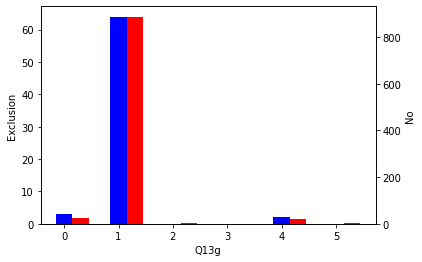

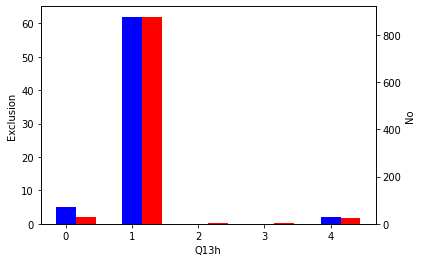

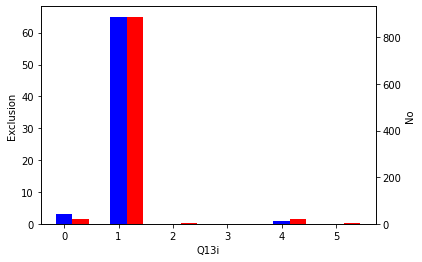

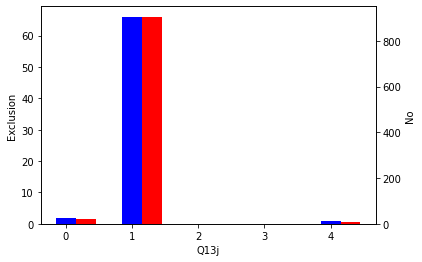

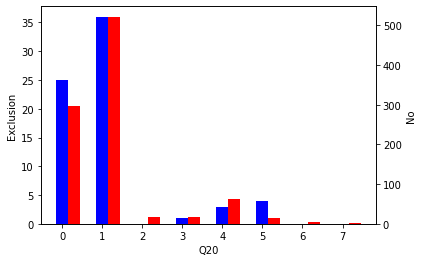

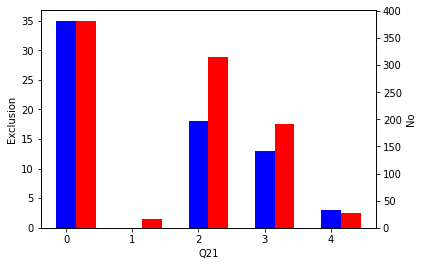

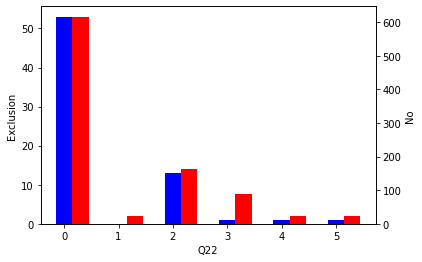

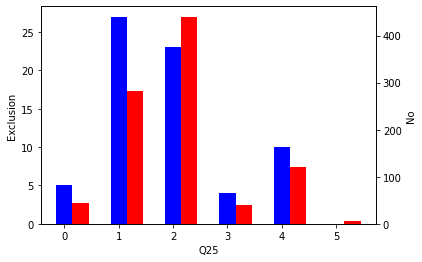

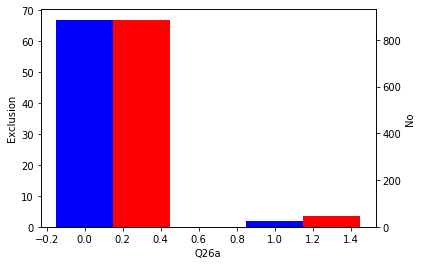

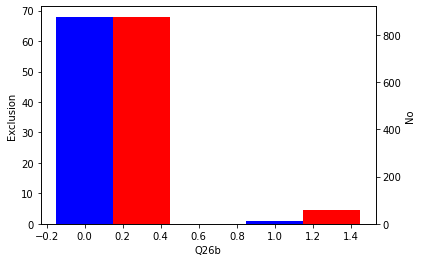

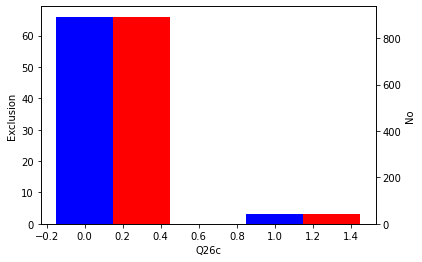

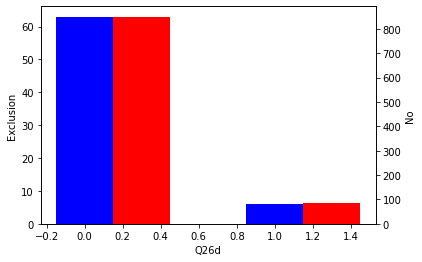

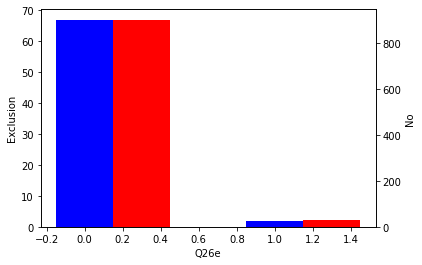

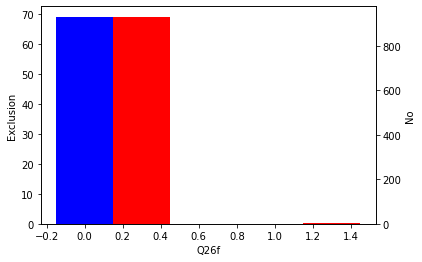

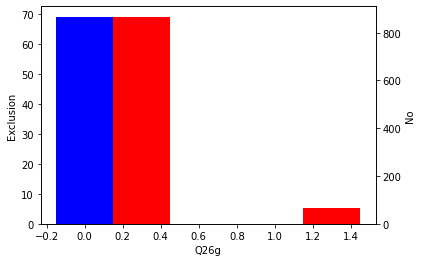

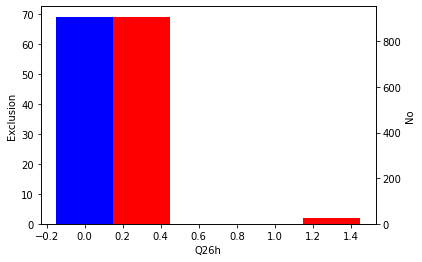

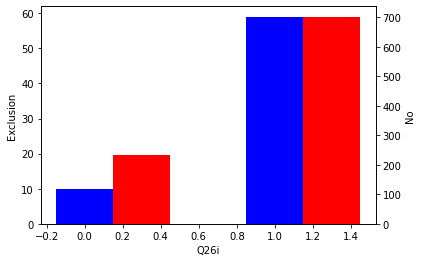

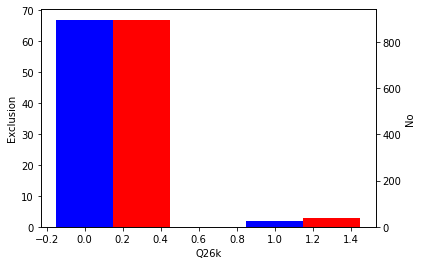

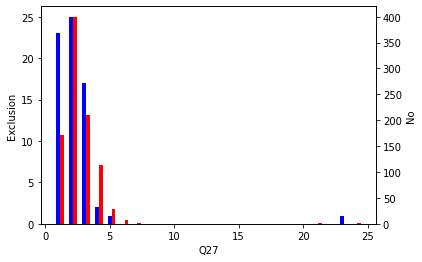

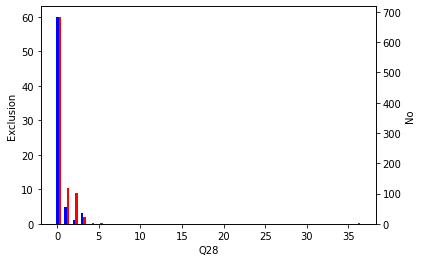

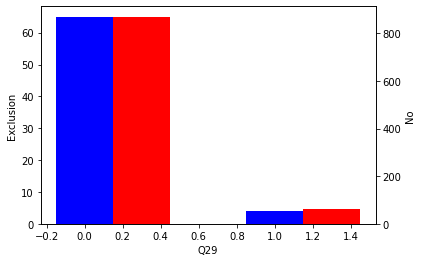

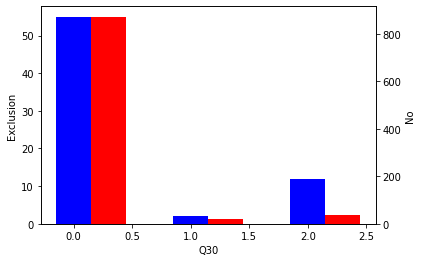

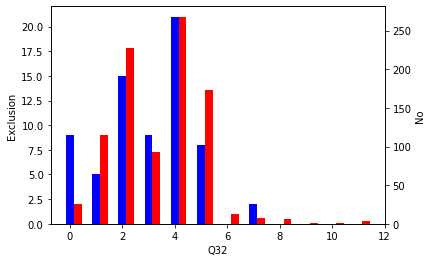

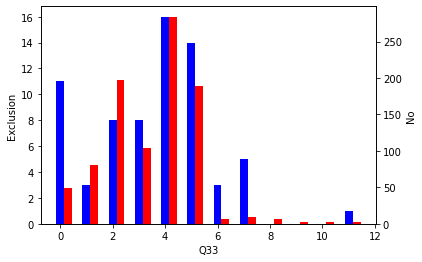

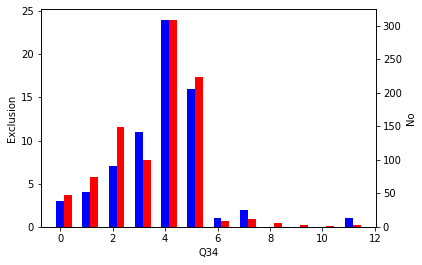

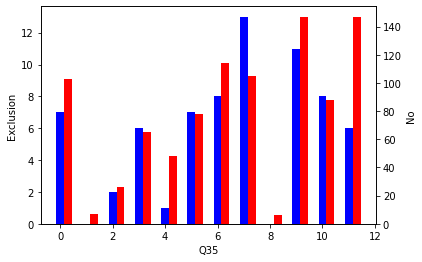

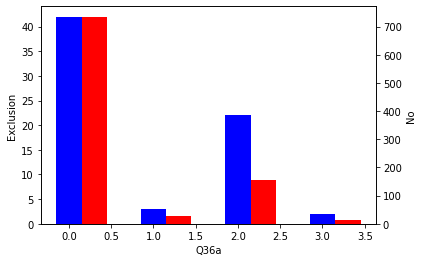

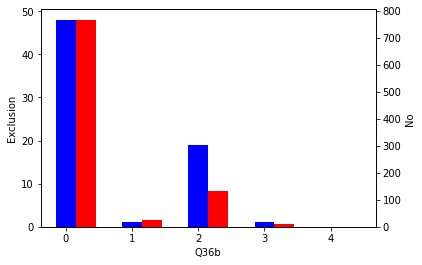

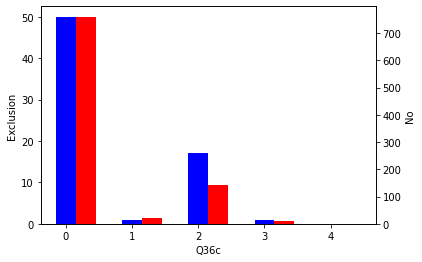

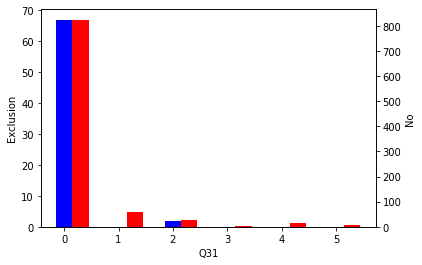

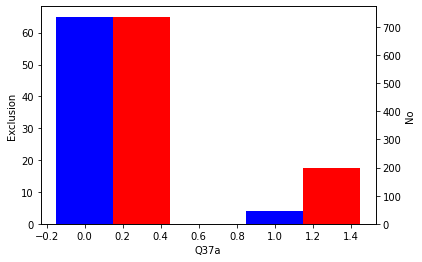

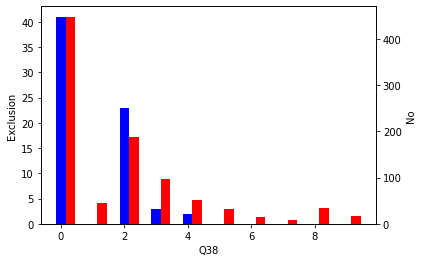

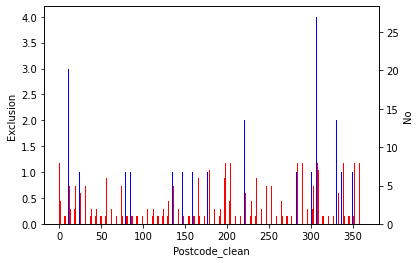

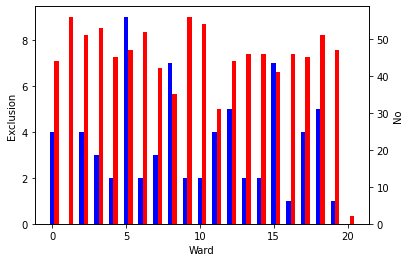

In [3]:
# Generate scatter plot of independent vs Dependent variable
fig = plt.figure(figsize = (18, 18))
from collections import Counter

j = 0



for feature_name in WCC_Survey_Features.columns:
    exclusion = Counter(WCC_Survey_1[feature_name])
    no_exclusion = Counter(WCC_Survey_0[feature_name])
    fig = plt.figure()
    ax = fig.add_subplot() # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    plt.xlabel = (feature_name)
    w=0.3
    a,b = zip(*no_exclusion.items())
    ax.bar(*zip(*exclusion.items()), align = 'center',color = 'b', width = w)
    ax2.bar(np.asarray(a)+w,b, align='center',color = 'r', width = w)
    ax.set_ylabel('Exclusion')
    ax2.set_ylabel('No')
    ax.set_xlabel(feature_name)
    plt.show()
    j+=1
    
    
    


In [5]:
#Create dataset for testing and scale between 0 and 1
print(WCC_Survey.columns)


target = ["Target"]
features = list(set(list(WCC_Survey.columns))-set(target))
WCC_Survey[features] = WCC_Survey[features]/WCC_Survey[features].max()


WCC_Survey.describe()

X = WCC_Survey[features].values
y = WCC_Survey[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


Index(['Target', 'S1', 'AGE', 'Q3', 'Q4', 'Q5a', 'Q5b', 'Q5c', 'Q5d', 'Q5e',
       'Q5f', 'Q5g', 'Q5h', 'Q5i', 'Q5j', 'Q5k', 'Q5l', 'Q8a', 'Q8b', 'Q8c',
       'Q8d', 'Q8e', 'Q8f', 'Q11a', 'Q11b', 'Q11c', 'Q11d', 'Q11e', 'Q12a',
       'Q12b', 'Q12c', 'Q12d', 'Q12e', 'Q12f', 'Q12g', 'Q12h', 'Q12i', 'Q12j',
       'Q12k', 'Q12l', 'Q13a', 'Q13b', 'Q13c', 'Q13d', 'Q13e', 'Q13f', 'Q13g',
       'Q13h', 'Q13i', 'Q13j', 'Q20', 'Q21', 'Q22', 'Q25', 'Q26a', 'Q26b',
       'Q26c', 'Q26d', 'Q26e', 'Q26f', 'Q26g', 'Q26h', 'Q26i', 'Q26k', 'Q27',
       'Q28', 'Q29', 'Q30', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36a', 'Q36b', 'Q36c',
       'Q31', 'Q37a', 'Q38', 'Postcode_clean', 'Ward'],
      dtype='object')


In [6]:
#Train with linear regression for later comparison
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))


0.23341464923882244
0.21943355815378252
0.2504310596990519
-0.24607599883595666


In [7]:
#Elastic Net
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

0.25538614340836885
0.06556667678387795
0.21960057309398423
0.041846507736361005


In [9]:
#try l1 ratio = 1 >> 

from sklearn.linear_model import LogisticRegressionCV

l1ratio = np.ones(len(y_train))
model_LR = LogisticRegressionCV(cv = 10, penalty = 'elasticnet', solver = 'saga',max_iter = 10000, multi_class = 'multinomial',l1_ratios = l1ratio)
model_LR.fit(X_train, y_train)
pred_train_LR= model_LR.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_LR)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

/opt/anaconda3/envs/WCC_MSc/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyboardInterrupt: 

In [ ]:
#try l1 ratio = 0 >> 

from sklearn.linear_model import LogisticRegressionCV

l1ratio = np.zeros(len(y_train))
model_LR = LogisticRegressionCV(cv = 10, penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial',l1_ratios = l1ratio)
model_LR.fit(X_train, y_train)
pred_train_LR= model_LR.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_LR)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

In [ ]:
#try l1 ratio = 0.5 >> 

from sklearn.linear_model import LogisticRegressionCV

l1ratio = 0.5*np.ones(len(y_train))
model_LR = LogisticRegressionCV(cv = 10, penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial',l1_ratios = l1ratio)
model_LR.fit(X_train, y_train)
pred_train_LR= model_LR.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_LR)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))